In [1]:
import pandas as pd
import numpy as np
data1=pd.read_excel("table_A.xlsx")
data2=pd.read_csv("table_B_attribution.csv")

In [2]:
#Fillna replaces the nan values with next value in that column
data1=data1.fillna(method='ffill')
data1.head()

In [3]:
len(data1)


79643

In [4]:
data1.head()

,Conv_Date,Revenue,User_ID,Conv_ID
0,2017-03-06,47.00000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c
1,2017-03-02,98.00004,5094298f068196c5349d43847de5afc9125cf989,faf5c1181ea84a32237dff45ca201d2c28f19d7b
2,2017-03-02,180.35300,5094298f068196c5349d43847de5afc9125cf989,b0e58a88459ece1b585ca22c93e633dc56273b83
3,2017-03-23,201.94104,433fdf385e33176cf9b0d67ecf383aa928fa261c,f0e6b7de22332c7b18c024e550bb1d860130cdf1
4,2017-03-03,197.47008,433fdf385e33176cf9b0d67ecf383aa928fa261c,966568c7c859480c79b212520d20a51e735fd735


In [5]:
len(data2)


211060

In [6]:
data2.head()

,Channel,IHC_Conv,Conv_ID
0,H,1.000000,881152bb20f9b73daafb99d77714f38ac702629c
1,I,0.300250,faf5c1181ea84a32237dff45ca201d2c28f19d7b
2,A,0.322839,faf5c1181ea84a32237dff45ca201d2c28f19d7b
3,E,0.376911,faf5c1181ea84a32237dff45ca201d2c28f19d7b
4,H,1.000000,b0e58a88459ece1b585ca22c93e633dc56273b83


In [7]:
merge = pd.merge(left=data1, right=data2, how='inner', on='Conv_ID')


In [8]:
duplicate=merge.drop_duplicates()
len(duplicate)

211060

In [9]:
merge.head()

,Conv_Date,Revenue,User_ID,Conv_ID,Channel,IHC_Conv
0,2017-03-06,47.00000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c,H,1.000000
1,2017-03-02,98.00004,5094298f068196c5349d43847de5afc9125cf989,faf5c1181ea84a32237dff45ca201d2c28f19d7b,I,0.300250
2,2017-03-02,98.00004,5094298f068196c5349d43847de5afc9125cf989,faf5c1181ea84a32237dff45ca201d2c28f19d7b,A,0.322839
3,2017-03-02,98.00004,5094298f068196c5349d43847de5afc9125cf989,faf5c1181ea84a32237dff45ca201d2c28f19d7b,E,0.376911
4,2017-03-02,180.35300,5094298f068196c5349d43847de5afc9125cf989,b0e58a88459ece1b585ca22c93e633dc56273b83,H,1.000000


In [10]:
len(merge)

211060

In [11]:
merge.count(axis=0)

Conv_Date    211060
Revenue      211060
User_ID      211060
Conv_ID      211060
Channel      211060
IHC_Conv     211060
dtype: int64

In [12]:
count1 = merge['User_ID'].value_counts(ascending=True) 
count1.head(10)

5a2d5e82bc2407630f640bbd04763d807ff0d643    1
a00add237fbc1ebce98350ca5f82544fb4f86715    1
0d630281df87cf3d37f4aa2c16f766e7e0d89255    1
e3326d0c5c40d675cb943f58f7a8f79449d2654d    1
043a84b8753e694353f8019e5441263fb3726fa3    1
4227eaf7247a1ba82f651e71a87ce39d56687c7b    1
0263c590b5e4ed0131f198dbbfc46e98434c6141    1
4fad8819db75f6c1fce0d24faa72e97852d9a8b0    1
03fd97c0604cc559bac3b4d14019ac76f1f536cd    1
aead140741917d736aef33f2adc847d8347aa07b    1
Name: User_ID, dtype: int64

In [13]:
count2 = merge['Channel'].value_counts(ascending=False) 
count2

A    41509
G    37193
H    29674
I    24508
B    22861
E    15606
C     8781
K     6497
J     5390
L     4855
M     4664
D     2659
N     1675
F     1600
S     1485
R      824
P      652
O      325
U      141
T       80
V       44
Q       37
Name: Channel, dtype: int64

In [14]:
count3 = merge['Conv_Date'].value_counts(ascending=True) 
count3


2017-04-19     123
2017-12-25     136
2017-04-21     158
2017-04-22     158
2017-04-15     167
              ... 
2017-11-26    2218
2017-04-01    2566
2017-04-08    2923
2017-11-24    3052
2018-03-08    4627
Name: Conv_Date, Length: 389, dtype: int64

In [15]:
select1=merge.groupby(['User_ID','Channel']).size().reset_index().rename(columns={0:'count'}).sort_values(['count'], ascending=False) 
select1

,User_ID,Channel,count
21101,2357094c8066db76239092d6795f95f9a011f39b,A,197
21106,2357094c8066db76239092d6795f95f9a011f39b,G,170
21108,2357094c8066db76239092d6795f95f9a011f39b,I,127
21107,2357094c8066db76239092d6795f95f9a011f39b,H,124
26530,2c75940486d75040f269c9671ab746dffefe9692,A,112
...,...,...,...
55092,5ce0ce77c1cbeccd114b523c86e7199f890e8e3f,L,1
55091,5ce0ce77c1cbeccd114b523c86e7199f890e8e3f,I,1
55090,5ce0ce77c1cbeccd114b523c86e7199f890e8e3f,H,1
55089,5ce0ce77c1cbeccd114b523c86e7199f890e8e3f,G,1


In [16]:
select2=merge.groupby(['User_ID','Conv_Date','Revenue']).size().reset_index().rename(columns={0:'count of diff channel for the user'}).sort_values(['Conv_Date'], ascending=False) 
select2

,User_ID,Conv_Date,Revenue,count of diff channel for the user
64085,cd0a9c268367afa6bdbb85820f043a789d3ba3e7,2018-03-26,195.83200,2
13391,29d0753e71d5c032a152035863fa9fd28c7f06a9,2018-03-26,57.71600,1
36190,7330e6204cef510136a5964ad662b78d8d2ed8ed,2018-03-26,142.13600,1
36171,7323ffa43c17288115b972f6d90ae3fe241b054a,2018-03-26,142.96800,4
36170,7323ffa43c17288115b972f6d90ae3fe241b054a,2018-03-26,116.71200,1
...,...,...,...,...
15987,3201672424f191ac463aae4316b0145973a4087b,2017-03-01,150.47060,2
61502,c4f7ba997d73f52ee2cec5932dcef44990b9187a,2017-03-01,127.17660,3
52100,a60ae215e78c43eb9f80ea4cf9305ca7c991a985,2017-03-01,97.88240,2
75319,f1f36fe0dd1f34b7e7336fd0bfd2f6e95a14f804,2017-03-01,210.41176,1


In [17]:
select3=merge.groupby(['Conv_Date','User_ID']).size().reset_index().rename(columns={0:'count of diff channel for the user'}).sort_values(['Conv_Date'],ascending=False) 
select3

,Conv_Date,User_ID,count of diff channel for the user
76642,2018-03-26,fc9bf9b226c6f217ae4606663a10a1024ebefe2b,2
76516,2018-03-26,52c10787bb57cf1048c29a8632835ec562deecf1,1
76525,2018-03-26,651984558d9a0cb70e3fdfc528715eff33a0bbe3,1
76524,2018-03-26,64c2d8db9e78eccb039e35c9ef02b9c21e7142c6,2
76523,2018-03-26,6327a15869e3f06919de734724473eda173a2419,4
...,...,...,...
131,2017-03-01,a84f215f210635ec0048ec81f955fb91347cafb5,2
130,2017-03-01,a7de9dc223eaf1d705cf49aed51a65bf35976b40,2
129,2017-03-01,a6cdd56e34594bc65c0ff49004c0dd029407fd13,3
128,2017-03-01,a60ae215e78c43eb9f80ea4cf9305ca7c991a985,2


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [19]:
n_trans = merge.groupby(['User_ID'])['Conv_ID'].nunique()
mult_trans_perc = np.sum(n_trans > 1) / merge['User_ID'].nunique()
print(f'{100 * mult_trans_perc:.2f}% of customers done transaction more than once.')

17.96% of customers done transaction more than once.


## COHORT ANALYSIS

New column called CohortGroup, which is the year and month in which the user's first purchase occurred.

In [22]:
merge['Conv_Period'] = merge.Conv_Date.apply(lambda x: x.strftime('%Y-%m'))
merge.head()

,Conv_Date,Revenue,User_ID,Conv_ID,Channel,IHC_Conv,Conv_Period
0,2017-03-06,47.00000,5094298f068196c5349d43847de5afc9125cf989,881152bb20f9b73daafb99d77714f38ac702629c,H,1.000000,2017-03
1,2017-03-02,98.00004,5094298f068196c5349d43847de5afc9125cf989,faf5c1181ea84a32237dff45ca201d2c28f19d7b,I,0.300250,2017-03
2,2017-03-02,98.00004,5094298f068196c5349d43847de5afc9125cf989,faf5c1181ea84a32237dff45ca201d2c28f19d7b,A,0.322839,2017-03
3,2017-03-02,98.00004,5094298f068196c5349d43847de5afc9125cf989,faf5c1181ea84a32237dff45ca201d2c28f19d7b,E,0.376911,2017-03
4,2017-03-02,180.35300,5094298f068196c5349d43847de5afc9125cf989,b0e58a88459ece1b585ca22c93e633dc56273b83,H,1.000000,2017-03


In [23]:
#merge.to_csv("samp.csv",index=False)

In [24]:
merge.set_index('User_ID', inplace=True)
#merge['CohortGroup'] = merge.groupby(level=0)['Conv_Date'].min()

merge['CohortGroup'] = merge.groupby(level=0)['Conv_Date'].min().apply(lambda x: x.strftime('%Y-%m'))
merge.reset_index(inplace=True)
merge.head(5)

,User_ID,Conv_Date,Revenue,Conv_ID,Channel,IHC_Conv,Conv_Period,CohortGroup
0,5094298f068196c5349d43847de5afc9125cf989,2017-03-06,47.00000,881152bb20f9b73daafb99d77714f38ac702629c,H,1.000000,2017-03,2017-03
1,5094298f068196c5349d43847de5afc9125cf989,2017-03-02,98.00004,faf5c1181ea84a32237dff45ca201d2c28f19d7b,I,0.300250,2017-03,2017-03
2,5094298f068196c5349d43847de5afc9125cf989,2017-03-02,98.00004,faf5c1181ea84a32237dff45ca201d2c28f19d7b,A,0.322839,2017-03,2017-03
3,5094298f068196c5349d43847de5afc9125cf989,2017-03-02,98.00004,faf5c1181ea84a32237dff45ca201d2c28f19d7b,E,0.376911,2017-03,2017-03
4,5094298f068196c5349d43847de5afc9125cf989,2017-03-02,180.35300,b0e58a88459ece1b585ca22c93e633dc56273b83,H,1.000000,2017-03,2017-03


In [25]:
grouped = merge.groupby(['CohortGroup', 'Conv_Period'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'User_ID': pd.Series.nunique,
                       'Conv_ID': pd.Series.nunique,
                       'Revenue': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'User_ID': 'TotalUsers',
                        'Conv_ID': 'TotalTransaction'}, inplace=True)
cohorts.head(20)

TotalUsers  TotalTransaction       Revenue
CohortGroup Conv_Period                                            
2017-03     2017-03            4444              4966  2.105992e+06
            2017-04            1047              1251  8.382417e+05
            2017-05             636               775  4.034822e+05
            2017-06             568               665  4.068527e+05
            2017-07             540               619  3.540108e+05
            2017-08             392               463  2.557685e+05
            2017-09             517               630  4.152231e+05
            2017-10             469               545  3.737068e+05
            2017-11             496               564  3.787516e+05
            2017-12             317               366  2.556317e+05
            2018-01             330               392  2.427457e+05
            2018-02             303               368  2.586370e+05
            2018-03             277               339  2.211106e+05
2017-04     2017-04            7261              7815  3.858751e+06
            2017-05             573               689  3.432666e+05
            2017-06             594               669  4.192549e+05
            2017-07             676               762  4.396268e+05
            2017-08             404               452  2.356273e+05
            2017-09             721               830  5.584748e+05
            2017-10             778               861  5.366635e+05

In [26]:
def cohort_period(merge):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    
    """
    merge['CohortPeriod'] = np.arange(len(merge)) + 1
    return merge

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head(13)

TotalUsers  TotalTransaction       Revenue  \
CohortGroup Conv_Period                                               
2017-03     2017-03            4444              4966  2.105992e+06   
            2017-04            1047              1251  8.382417e+05   
            2017-05             636               775  4.034822e+05   
            2017-06             568               665  4.068527e+05   
            2017-07             540               619  3.540108e+05   
            2017-08             392               463  2.557685e+05   
            2017-09             517               630  4.152231e+05   
            2017-10             469               545  3.737068e+05   
            2017-11             496               564  3.787516e+05   
            2017-12             317               366  2.556317e+05   
            2018-01             330               392  2.427457e+05   
            2018-02             303               368  2.586370e+05   
            2018-03             277               339  2.211106e+05   

                         CohortPeriod  
CohortGroup Conv_Period                
2017-03     2017-03                 1  
            2017-04                 2  
            2017-05                 3  
            2017-06                 4  
            2017-07                 5  
            2017-08                 6  
            2017-09                 7  
            2017-10                 8  
            2017-11                 9  
            2017-12                10  
            2018-01                11  
            2018-02                12  
            2018-03                13

In [28]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head(13)

CohortGroup
2017-03    4444
2017-04    7261
2017-05    3188
2017-06    3791
2017-07    4058
2017-08    3387
2017-09    4517
2017-10    4449
2017-11    5172
2017-12    3180
2018-01    4010
2018-02    4066
2018-03    3811
Name: TotalUsers, dtype: int64

In [29]:
cohorts['TotalUsers'].head(5)


CohortGroup  CohortPeriod
2017-03      1               4444
             2               1047
             3                636
             4                568
             5                540
Name: TotalUsers, dtype: int64

In [30]:
cohorts['TotalUsers'].unstack(0).head(13)


CohortGroup,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
CohortPeriod,,,,,,,,,,,,,
1,4444.0,7261.0,3188.0,3791.0,4058.0,3387.0,4517.0,4449.0,5172.0,3180.0,4010.0,4066.0,3811.0
2,1047.0,573.0,187.0,182.0,124.0,147.0,132.0,138.0,82.0,60.0,88.0,83.0,NaN
3,636.0,594.0,218.0,137.0,130.0,120.0,147.0,61.0,59.0,62.0,65.0,NaN,NaN
4,568.0,676.0,161.0,152.0,117.0,109.0,79.0,59.0,52.0,42.0,NaN,NaN,NaN
5,540.0,404.0,218.0,153.0,137.0,52.0,93.0,53.0,65.0,NaN,NaN,NaN,NaN
6,392.0,721.0,208.0,165.0,63.0,59.0,73.0,63.0,NaN,NaN,NaN,NaN,NaN
7,517.0,778.0,188.0,82.0,85.0,58.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN
8,469.0,631.0,134.0,96.0,65.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,496.0,334.0,101.0,89.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
CohortPeriod,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.235599,0.078915,0.058657,0.048008,0.030557,0.043401,0.029223,0.031018,0.015855,0.018868,0.021945,0.020413,NaN
3,0.143114,0.081807,0.068381,0.036138,0.032035,0.035430,0.032544,0.013711,0.011408,0.019497,0.016209,NaN,NaN
4,0.127813,0.093100,0.050502,0.040095,0.028832,0.032182,0.017489,0.013261,0.010054,0.013208,NaN,NaN,NaN
5,0.121512,0.055640,0.068381,0.040359,0.033760,0.015353,0.020589,0.011913,0.012568,NaN,NaN,NaN,NaN
6,0.088209,0.099298,0.065245,0.043524,0.015525,0.017420,0.016161,0.014160,NaN,NaN,NaN,NaN,NaN
7,0.116337,0.107148,0.058971,0.021630,0.020946,0.017124,0.013726,NaN,NaN,NaN,NaN,NaN,NaN
8,0.105536,0.086903,0.042033,0.025323,0.016018,0.015648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.111611,0.045999,0.031681,0.023477,0.017250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


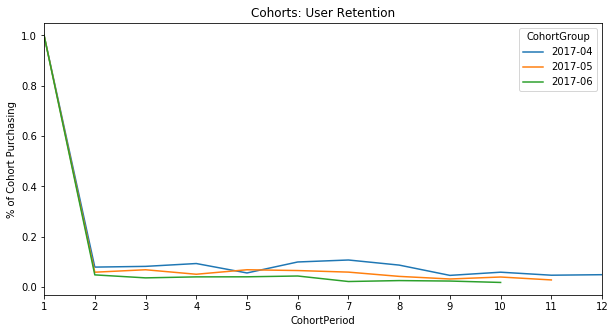

In [32]:
user_retention[['2017-04', '2017-05', '2017-06']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

### User Retention Map

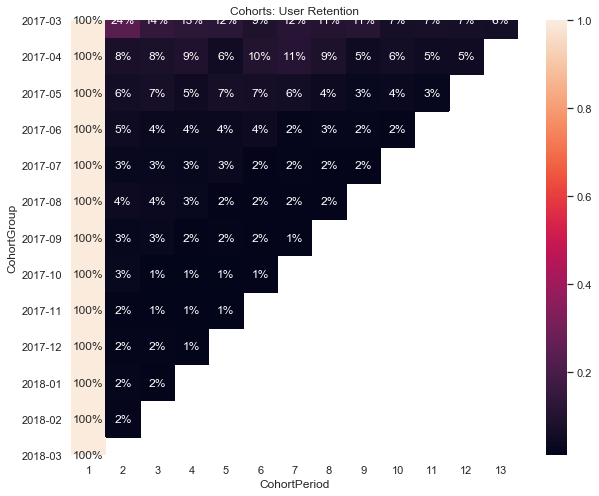

In [33]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(10, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

In [34]:
df['Conv_Date'].max()


Timestamp('2018-03-26 00:00:00')

Last transaction date is 2018/03/26 ..So i took next day i.e 2018/03/27

In [35]:
import datetime as dt
NOW = dt.datetime(2018,3,27)

## RFM TABLE

In [36]:
rfmTable = df.groupby('User_ID').agg({'Conv_Date': lambda x: (NOW - x.max()).days, 'Conv_ID': lambda x: len(x), 'Revenue': lambda x: x.sum()})
rfmTable['Conv_Date'] = rfmTable['Conv_Date'].astype(int)
rfmTable.rename(columns={'Conv_Date': 'recency', 
                         'Conv_ID': 'frequency', 
                         'Revenue': 'monetary_value'}, inplace=True)


Calculate RFM metrics for each customer


In [37]:
rfmTable.head()

,recency,frequency,monetary_value
User_ID,,,
00003ce67d6b73b2d49f4036f60cb73385a9c96e,146,4,615.360
0003509d64606735e66a3d32f2a1a084f613ee4b,89,5,700.864
00035f943a8a8e176fdd5a44059b38dcc0c73f5a,38,7,3146.624
0003f10010cd3dadcb7182ed7b0abf5166393e91,287,1,121.808
0003fc733e4ff3bfb295f2c10c7077fb0763ebcc,28,1,108.720


Interpretation

User_ID 00003ce67d6b73b2d49f4036f60cb73385a9c96e has frequency: 4, monetary value: 615.360 and recency: 146 days.

User_ID 0003509d64606735e66a3d32f2a1a084f613ee4b has frequency: 5, monetary value: 700.864 and recency: 89 days.


In [38]:
first_customer=df[df['User_ID']== '5094298f068196c5349d43847de5afc9125cf989']
first_customer.head()

,User_ID,Conv_Date,Revenue,Conv_ID,Channel,IHC_Conv,Conv_Period,CohortGroup
0,5094298f068196c5349d43847de5afc9125cf989,2017-03-06,47.00000,881152bb20f9b73daafb99d77714f38ac702629c,H,1.000000,2017-03,2017-03
1,5094298f068196c5349d43847de5afc9125cf989,2017-03-02,98.00004,faf5c1181ea84a32237dff45ca201d2c28f19d7b,I,0.300250,2017-03,2017-03
2,5094298f068196c5349d43847de5afc9125cf989,2017-03-02,98.00004,faf5c1181ea84a32237dff45ca201d2c28f19d7b,A,0.322839,2017-03,2017-03
3,5094298f068196c5349d43847de5afc9125cf989,2017-03-02,98.00004,faf5c1181ea84a32237dff45ca201d2c28f19d7b,E,0.376911,2017-03,2017-03
4,5094298f068196c5349d43847de5afc9125cf989,2017-03-02,180.35300,b0e58a88459ece1b585ca22c93e633dc56273b83,H,1.000000,2017-03,2017-03


Split the metrics

The easiest way to split metrics into segments is by using quartiles.

In [39]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

## Create a segmented RFM table


In [40]:
segmented_rfm = rfmTable


The lowest recency, highest frequency and monetary amounts are our best customers.


In [41]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [42]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
User_ID,,,,,,
00003ce67d6b73b2d49f4036f60cb73385a9c96e,146,4,615.360,2,2,2
0003509d64606735e66a3d32f2a1a084f613ee4b,89,5,700.864,2,1,1
00035f943a8a8e176fdd5a44059b38dcc0c73f5a,38,7,3146.624,1,1,1
0003f10010cd3dadcb7182ed7b0abf5166393e91,287,1,121.808,4,4,4
0003fc733e4ff3bfb295f2c10c7077fb0763ebcc,28,1,108.720,1,4,4


Add a new column to combine RFM score: 111 is the highest score as we determined earlier.


In [43]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str)  + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
User_ID,,,,,,,
00003ce67d6b73b2d49f4036f60cb73385a9c96e,146,4,615.360,2,2,2,222
0003509d64606735e66a3d32f2a1a084f613ee4b,89,5,700.864,2,1,1,211
00035f943a8a8e176fdd5a44059b38dcc0c73f5a,38,7,3146.624,1,1,1,111
0003f10010cd3dadcb7182ed7b0abf5166393e91,287,1,121.808,4,4,4,444
0003fc733e4ff3bfb295f2c10c7077fb0763ebcc,28,1,108.720,1,4,4,144


### Who are the top 10 of our best customers!


In [44]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)


,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
User_ID,,,,,,,
2c75940486d75040f269c9671ab746dffefe9692,4,732,188276.21412,1,1,1,111
31e3c730764f2913e56fcae325f92a82bc94a4aa,6,175,82045.18148,1,1,1,111
0ad05472146efb8b505f113c4cdc3a88b5a89f41,11,336,65937.13600,1,1,1,111
72df33e2b3ccfebff04123e211ef07d5f39a2324,31,116,36141.88224,1,1,1,111
37339f068a6e98afabcde8943c552254d67f49b2,2,91,34377.49360,1,1,1,111
01b91ca588ca5072bbe879bd0bebf5f733ddf933,30,57,32743.38400,1,1,1,111
4ac5eadb5c74e24d80aa806624b3de3ee5c0732a,18,65,30192.80400,1,1,1,111
be7cd84e8b175933f5b86276b429d87d414b5f4a,30,147,29968.86324,1,1,1,111
f3082ca1f6c34452b3e4048ae0de7810f0edc2d5,19,126,28118.73200,1,1,1,111


In [46]:
#count = segmented_rfm['RFMScore'].value_counts(ascending=False) 
#count

In [47]:
segmented_rfm.groupby('RFMScore').agg('monetary_value').mean()


RFMScore
111    2909.817261
112     558.314136
113     289.562118
121    1014.190409
122     497.577781
          ...     
434     140.346637
441     922.518545
442     424.016735
443     237.139250
444     118.508442
Name: monetary_value, Length: 61, dtype: float64

Another possibility is to combine the scores to create one score (eg. 4+1+1). This will create a score between 3 and 12. Here the advantage is that each of the scores got same importance. However some scores will have many segments as constituents (eg - 413 ad 431)

In [45]:
segmented_rfm['Total Score'] = segmented_rfm['r_quartile'] + segmented_rfm['f_quartile'] +segmented_rfm['m_quartile']
print(segmented_rfm.head(), segmented_rfm.info())


<class 'pandas.core.frame.DataFrame'>
Index: 55334 entries, 00003ce67d6b73b2d49f4036f60cb73385a9c96e to fffe9ce5489133e44db3fa2c77d10c9cfa1fdb13
Data columns (total 8 columns):
recency           55334 non-null int32
frequency         55334 non-null int64
monetary_value    55334 non-null float64
r_quartile        55334 non-null int64
f_quartile        55334 non-null int64
m_quartile        55334 non-null int64
RFMScore          55334 non-null object
Total Score       55334 non-null int64
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 3.6+ MB
                                          recency  frequency  monetary_value  \
User_ID                                                                        
00003ce67d6b73b2d49f4036f60cb73385a9c96e      146          4         615.360   
0003509d64606735e66a3d32f2a1a084f613ee4b       89          5         700.864   
00035f943a8a8e176fdd5a44059b38dcc0c73f5a       38          7        3146.624   
0003f10010cd3dadcb7182ed7b0abf516639

In [46]:
segmented_rfm.groupby('Total Score').agg('monetary_value').mean()


Total Score
3     2909.817261
4     1720.788855
5     1082.145449
6      765.060889
7      510.765236
8      365.963157
9      242.246829
10     192.111574
11     153.198742
12     118.508442
Name: monetary_value, dtype: float64

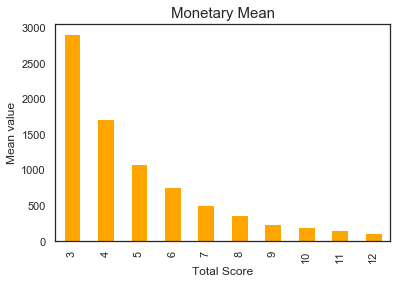

In [47]:
plt.title('Monetary Mean',size=15)
plt.ylabel('Mean value')
segmented_rfm.groupby('Total Score').agg('monetary_value').mean().plot.bar(color='orange')


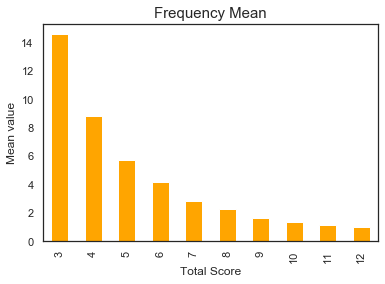

In [48]:
plt.title('Frequency Mean',size=15)
plt.ylabel('Mean value')
segmented_rfm.groupby('Total Score').agg('frequency').mean().plot.bar(color='orange')


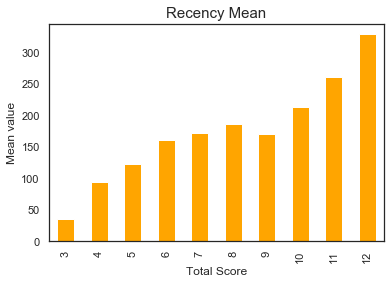

In [103]:
plt.title('Recency Mean',size=15)
plt.ylabel('Mean value')
segmented_rfm.groupby('Total Score').agg('recency').mean().plot.bar(color='orange')



# Churn Detection

Assumptions of the BG/NBD model:
    
A customer’s relationship has two phases: “alive” for an unobserved period of time, then “dead”
    
While alive, the number of transactions made by a customer follows a Poisson distribution with transaction rate lambda

Heterogeneity in lambda follows a gamma distribution

After any transaction, a customer dies with probability p; the probability that a customer dies after a number of transactions follows a geometric distribution

p follows a beta distribution

Lambda and p vary independently across customers

In [50]:
from lifetimes.utils import *
from lifetimes import BetaGeoFitter,GammaGammaFitter
from lifetimes.plotting import plot_probability_alive_matrix, plot_frequency_recency_matrix, plot_period_transactions, plot_cumulative_transactions,plot_incremental_transactions
from lifetimes.generate_data import beta_geometric_nbd_model
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases, plot_period_transactions,plot_history_alive

In [51]:
summary = summary_data_from_transaction_data(merge, 'User_ID', 'Conv_Date', monetary_value_col='Revenue', observation_period_end='2018-03-27')
summary

,frequency,recency,T,monetary_value
User_ID,,,,
00003ce67d6b73b2d49f4036f60cb73385a9c96e,0.0,0.0,146.0,0.000
0003509d64606735e66a3d32f2a1a084f613ee4b,1.0,53.0,142.0,606.976
00035f943a8a8e176fdd5a44059b38dcc0c73f5a,1.0,237.0,275.0,679.464
0003f10010cd3dadcb7182ed7b0abf5166393e91,0.0,0.0,287.0,0.000
0003fc733e4ff3bfb295f2c10c7077fb0763ebcc,0.0,0.0,28.0,0.000
...,...,...,...,...
fffb0fc0e6cde8d4838713679c0a6d3c28087671,0.0,0.0,109.0,0.000
fffc3a37495e0f44dbfe4511ec0d46460aa571e5,0.0,0.0,145.0,0.000
fffc95150d63e98e62d98cdfabbf13245fdc2dd2,0.0,0.0,113.0,0.000


### Example :
For User_Id =0003509d64606735e66a3d32f2a1a084f613ee4b 
#### Recency
Recency = 5/11/2017 - 28/12/2017 (diff b/w first transaction and last transaction) (ie) 53 days

28/12/2017 - 27/03/2018 (diff btw last transaction - last day (now) ) (ie) 89 days ..This is the recency in RFM model which is built previously

#### Age of customer(T):
T = 142 (53+89) (ie) first transaction - last day(now)



Many of the customers have frequency, recency, and monetary = 0. That's because Lifetimes only considers customers who have made repeat purchases into account.

In [52]:
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T']);

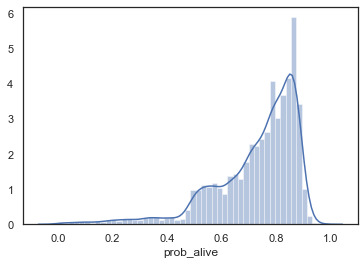

In [53]:
df = summary[summary['frequency']>0]

df['prob_alive'] = bgf.conditional_probability_alive(df['frequency'],df['recency'],df['T'])
sns.distplot(df['prob_alive']);

I considered a customer with <25% chance of being alive have to be churned..

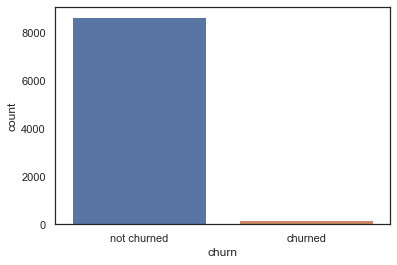

In [54]:
df['churn'] = ['churned' if p < .25 else 'not churned' for p in df['prob_alive']]
sns.countplot(df['churn']);

the customers who have churned are already lost.

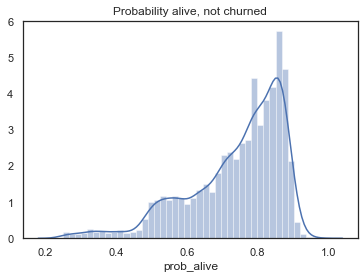

In [55]:
sns.distplot(df[df['churn']=='not churned']['prob_alive']).set_title('Probability alive, not churned');


In [56]:
df['churn'][(df['prob_alive']>=.25) & (df['prob_alive']<.35)] = "high risk"
df['churn'].value_counts()


not churned    8513
churned         169
high risk       139
Name: churn, dtype: int64

## Grouping based on highest probability channel value

In [60]:
import datetime


In [61]:
import datetime
merge = pd.read_csv("merge_new.csv")


In [62]:
group=merge.groupby('Conv_ID', group_keys=False).apply(lambda x: x.loc[x.IHC_Conv.idxmax()])
group.head()

,Conv_Date,Revenue,User_ID,Conv_ID,Channel,IHC_Conv
Conv_ID,,,,,,
0000ccb093df86fd1480a0aa5c2167233f8ab9cf,2017-11-27,230.97600,9e33e0f30f3f76b4581faea2310cce386769fe12,0000ccb093df86fd1480a0aa5c2167233f8ab9cf,A,0.540098
0000ea3393004ed1e855e74f5eec5ad96270a816,2017-03-12,135.76448,7fe7f993b2607fb0a49ddbb2b2836fd3673128a1,0000ea3393004ed1e855e74f5eec5ad96270a816,G,1.000000
00011c4ee4c3484ebaf68d328668f9c97c5eaa4f,2017-11-25,114.50400,5292372b8a4f1e07c91a50e15c7d06ff3f14a7e4,00011c4ee4c3484ebaf68d328668f9c97c5eaa4f,A,0.549969
00015d1120d462a27b4a58b4e3b63b3831be28f8,2017-10-17,90.90000,4e6e92b9ce6507da6c68d71871fdd572b2d845ab,00015d1120d462a27b4a58b4e3b63b3831be28f8,B,0.676489
00061879cf1e7229b4957a0d31723df0d5767cf3,2018-03-16,108.03600,310e3421aa1d5ff61b48cc153b460123218c0d10,00061879cf1e7229b4957a0d31723df0d5767cf3,A,0.910853


### converting date to day using function

In [63]:
dates=group['Conv_Date']

In [64]:
def date_to_day(date):
    day_list=[]
    day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
    for d in date:
        day = datetime.datetime.strptime(d, '%Y-%m-%d').weekday()
        day_list.append(day_name[day])
    return day_list

In [65]:
days_list=[]
days_list=date_to_day(dates)
#print(days_list)

In [66]:
group_df=group.copy()

In [67]:
group_df['Conv_Day']=days_list

In [68]:
group_df.head()

,Conv_Date,Revenue,User_ID,Conv_ID,Channel,IHC_Conv,Conv_Day
Conv_ID,,,,,,,
0000ccb093df86fd1480a0aa5c2167233f8ab9cf,2017-11-27,230.97600,9e33e0f30f3f76b4581faea2310cce386769fe12,0000ccb093df86fd1480a0aa5c2167233f8ab9cf,A,0.540098,Monday
0000ea3393004ed1e855e74f5eec5ad96270a816,2017-03-12,135.76448,7fe7f993b2607fb0a49ddbb2b2836fd3673128a1,0000ea3393004ed1e855e74f5eec5ad96270a816,G,1.000000,Sunday
00011c4ee4c3484ebaf68d328668f9c97c5eaa4f,2017-11-25,114.50400,5292372b8a4f1e07c91a50e15c7d06ff3f14a7e4,00011c4ee4c3484ebaf68d328668f9c97c5eaa4f,A,0.549969,Saturday
00015d1120d462a27b4a58b4e3b63b3831be28f8,2017-10-17,90.90000,4e6e92b9ce6507da6c68d71871fdd572b2d845ab,00015d1120d462a27b4a58b4e3b63b3831be28f8,B,0.676489,Tuesday
00061879cf1e7229b4957a0d31723df0d5767cf3,2018-03-16,108.03600,310e3421aa1d5ff61b48cc153b460123218c0d10,00061879cf1e7229b4957a0d31723df0d5767cf3,A,0.910853,Friday


In [69]:
group_df['Conv_Day'].value_counts()

Monday       12961
Sunday       12424
Friday       12074
Thursday     11244
Saturday     10873
Tuesday      10351
Wednesday     9688
Name: Conv_Day, dtype: int64